In [ ]:
!pip install ultralytics matplotlib

Labels: {0: 'motorbike and helmet', 1: 'motorbike and no helmet'}

0: 640x384 3 motorbike and no helmets, 28.7ms
Speed: 1.6ms preprocess, 28.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)
Results for 1.jpg:
Detected 3 objects
Saved cropped image: 1_0_motorbike_and_no_helmet.jpg
Saved cropped image: 1_1_motorbike_and_no_helmet.jpg
Saved cropped image: 1_2_motorbike_and_no_helmet.jpg


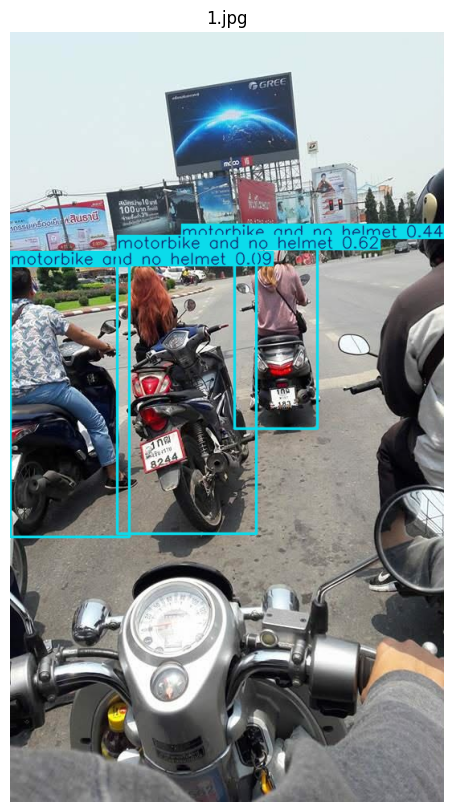


0: 384x640 1 motorbike and helmet, 33.5ms
Speed: 1.5ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Results for 2.jpg:
Detected 1 objects
Saved cropped image: 2_0_motorbike_and_helmet.jpg


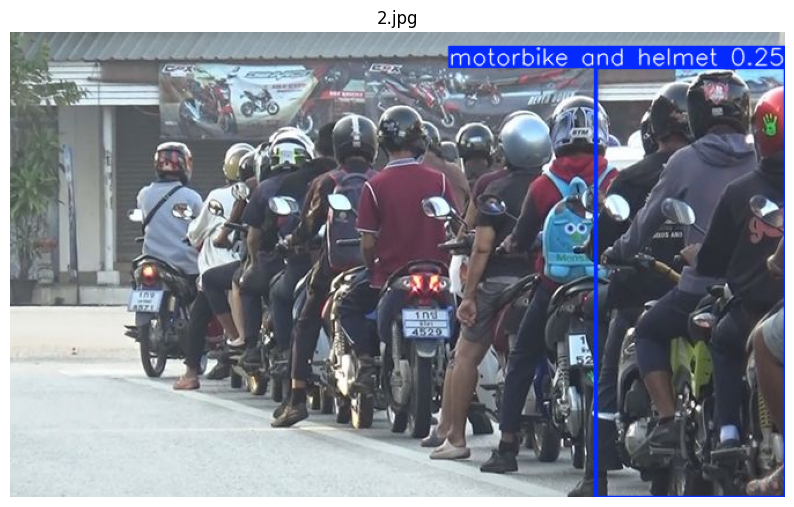


0: 384x640 1 motorbike and helmet, 2 motorbike and no helmets, 28.8ms
Speed: 1.1ms preprocess, 28.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Results for 3.jpg:
Detected 3 objects
Saved cropped image: 3_0_motorbike_and_helmet.jpg
Saved cropped image: 3_1_motorbike_and_no_helmet.jpg
Saved cropped image: 3_2_motorbike_and_no_helmet.jpg


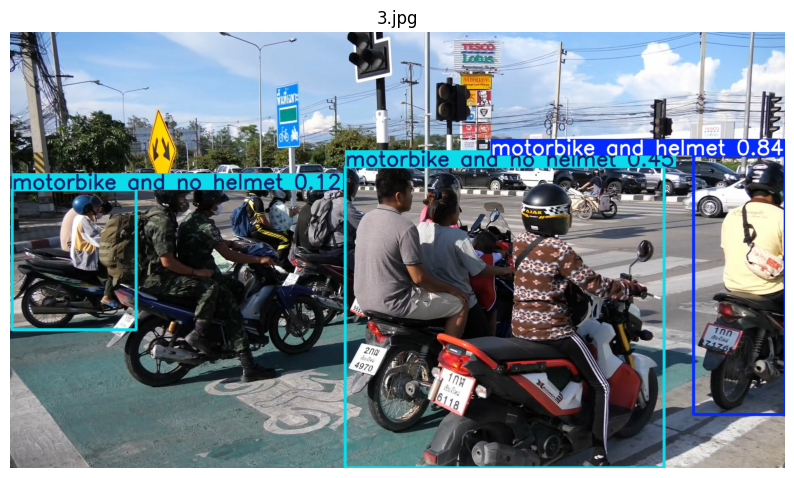


0: 480x640 4 motorbike and helmets, 49.2ms
Speed: 1.2ms preprocess, 49.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
Results for 4.jpg:
Detected 4 objects
Saved cropped image: 4_0_motorbike_and_helmet.jpg
Saved cropped image: 4_1_motorbike_and_helmet.jpg
Saved cropped image: 4_2_motorbike_and_helmet.jpg
Saved cropped image: 4_3_motorbike_and_helmet.jpg


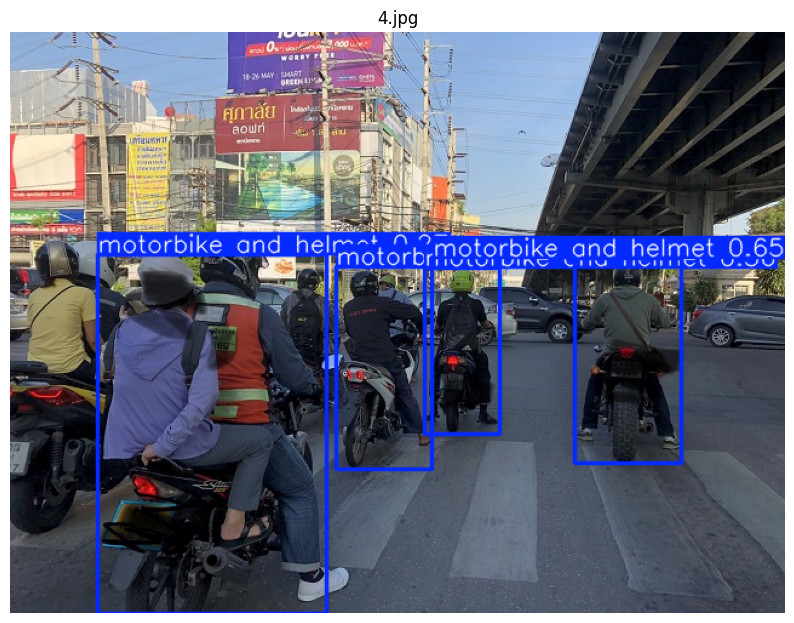

In [11]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# สร้างโฟลเดอร์ detected_image ถ้ายังไม่มี
os.makedirs('detected_image', exist_ok=True)

# โหลดโมเดล
model = YOLO('helmet_detected_mode.pt')

# กำหนด label เอง
model.model.names = {0: 'motorbike and helmet', 1: 'motorbike and no helmet'}

print("Labels:", model.names)

# โหลดทุกรูปใน test_image
for img_file in os.listdir('test_image'):
    if img_file.endswith('.jpg') and not img_file.startswith('detected_'):
        img_path = os.path.join('test_image', img_file)
        img = cv2.imread(img_path)
        
        # ทำการ detect
        results = model.predict(img, conf=0.05, iou=0.4)
        
        print(f"Results for {img_file}:")
        for result in results:
            print(f"Detected {len(result.boxes)} objects")
            
            # Crop and save each detected object
            for i, box in enumerate(result.boxes):
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
                cropped = img[y1:y2, x1:x2]
                label = model.names[int(box.cls[0])]
                crop_filename = f"{os.path.splitext(img_file)[0]}_{i}_{label.replace(' ', '_')}.jpg"
                cv2.imwrite(os.path.join('detected_image', crop_filename), cropped)
                print(f"Saved cropped image: {crop_filename}")
            
            annotated_img = result.plot()
            plt.figure(figsize=(10, 10))
            plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
            plt.title(img_file)
            plt.axis('off')
            plt.show()